<a href="https://colab.research.google.com/github/noorsaba5/Analysing-Data/blob/main/Countries%20Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Tell me about this dataset.

Here is all the data you need:
"countries.csv"

The task is to perform a comprehensive analysis of the countries.csv dataset. This involves loading the data, exploring its basic characteristics (shape, data types, descriptive statistics, missing values, and outliers), analyzing key variables like 'Population' and 'Area' for distributions, missing values, and relationships, and visualizing the findings using histograms, box plots, and scatter plots. The analysis aims to gain insights into the dataset, identify potential data quality issues, and suggest further steps for data cleaning and deeper exploration.


## Data loading

### Subtask:
Load the "countries.csv" file into a pandas DataFrame.


**Reasoning**:
Load the "countries.csv" file into a pandas DataFrame and display the first few rows to verify.



In [1]:
import pandas as pd

try:
    df = pd.read_csv('countries.csv')
    display(df.head())
except FileNotFoundError:
    print("Error: 'countries.csv' not found.")
    df = None
except pd.errors.ParserError:
    print("Error: Could not parse 'countries.csv'. Check the file format.")
    df = None
except Exception as e:
    print(f"An unexpected error occurred: {e}")
    df = None

,Name,Capital,Population,Area
0,Andorra,Andorra la Vella,84000,468.0
1,United Arab Emirates,Abu Dhabi,4975593,82880.0
2,Afghanistan,Kabul,29121286,647500.0
3,Antigua and Barbuda,St. John's,86754,443.0
4,Anguilla,The Valley,13254,102.0


## Data exploration

### Subtask:
Explore the loaded dataset to understand its basic characteristics.


**Reasoning**:
Explore the dataset by examining its shape, data types, descriptive statistics, missing values, and potential outliers.



Shape of the DataFrame: (250, 4)

Data types of each column:
 Name           object
Capital        object
Population      int64
Area          float64
dtype: object

Descriptive statistics for numerical columns:
          Population          Area
count  2.500000e+02  2.500000e+02
mean   2.744568e+07  5.996369e+05
std    1.168626e+08  1.911821e+06
min    0.000000e+00  0.000000e+00
25%    1.798562e+05  1.174750e+03
50%    4.288138e+06  6.489450e+04
75%    1.542062e+07  3.726315e+05
max    1.330044e+09  1.710000e+07

Missing values in each column:
 Name          0
Capital       8
Population    0
Area          0
dtype: int64

Percentage of missing values in each column:
 Name          0.0
Capital       3.2
Population    0.0
Area          0.0
dtype: float64


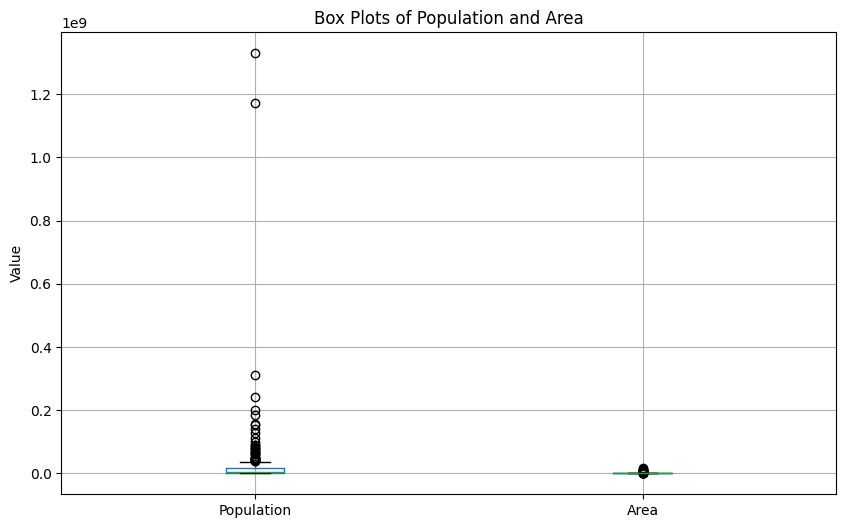

In [2]:
# Determine the shape of the DataFrame.
print("Shape of the DataFrame:", df.shape)

# Examine the data types of each column.
print("\nData types of each column:\n", df.dtypes)

# Generate descriptive statistics for numerical columns.
print("\nDescriptive statistics for numerical columns:\n", df.describe())

# Check for missing values in each column.
print("\nMissing values in each column:\n", df.isnull().sum())
print("\nPercentage of missing values in each column:\n", (df.isnull().sum() / len(df)) * 100)

# Identify potential outliers in numerical columns using box plots.
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
df.boxplot(column=['Population', 'Area'])
plt.title('Box Plots of Population and Area')
plt.ylabel('Value')
plt.show()

## Data analysis

### Subtask:
Analyze the distributions of key variables, identify potential outliers or missing values, and calculate additional descriptive statistics.


**Reasoning**:
Analyze the distributions of 'Population' and 'Area', identify rows with zero values, and investigate the missing 'Capital' values along with their corresponding 'Name' values.  Calculate descriptive statistics (skewness and kurtosis) for 'Population' and 'Area'. Explore the relationship between 'Population' and 'Area' using correlation and a scatter plot.



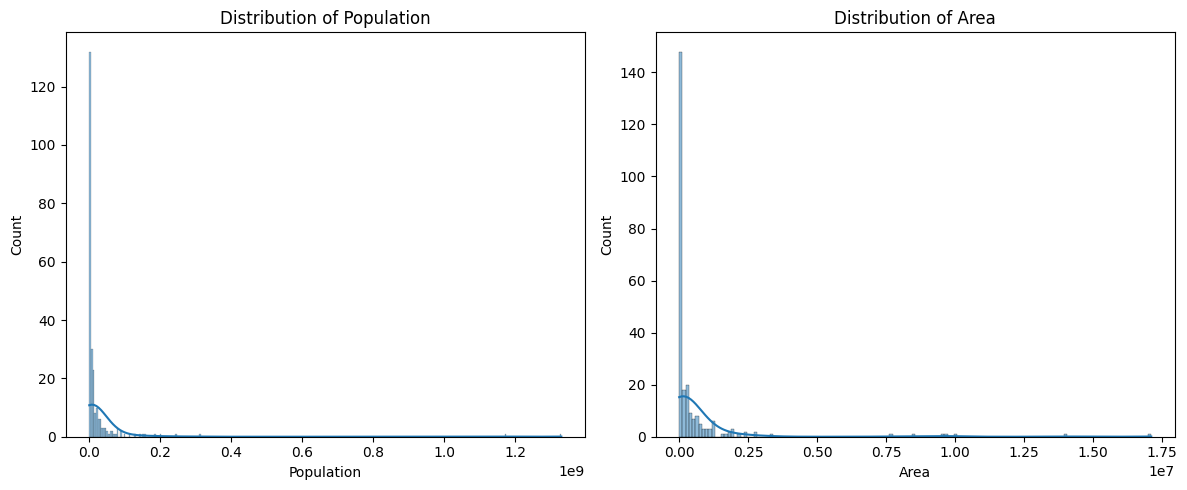


Number of rows with zero population: 4


,Name,Capital,Population,Area
8,Antarctica,NaN,0,14000000.0
33,Bouvet Island,NaN,0,49.0
95,Heard Island and McDonald Islands,NaN,0,412.0
231,U.S. Minor Outlying Islands,NaN,0,0.0



Number of rows with zero area: 1


,Name,Capital,Population,Area
231,U.S. Minor Outlying Islands,NaN,0,0.0



Rows with missing 'Capital' values:


,Name,Capital,Population,Area
8,Antarctica,NaN,0,14000000.0
33,Bouvet Island,NaN,0,49.0
95,Heard Island and McDonald Islands,NaN,0,412.0
102,Israel,NaN,7353985,20770.0
105,British Indian Ocean Territory,NaN,4000,60.0
182,Palestine,NaN,3800000,5970.0
219,Tokelau,NaN,1466,10.0
231,U.S. Minor Outlying Islands,NaN,0,0.0



Skewness and Kurtosis:
Population Skewness: 9.48498745164184
Population Kurtosis: 96.72624215225797
Area Skewness: 5.804733199403565
Area Kurtosis: 37.42244380889029

Correlation between Population and Area: 0.41262523547559055


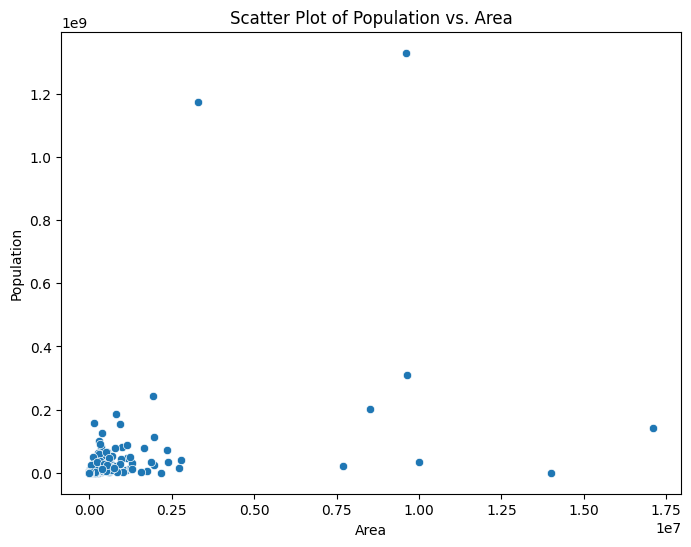

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis

# Analyze distributions of 'Population' and 'Area'
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['Population'], kde=True)
plt.title('Distribution of Population')
plt.subplot(1, 2, 2)
sns.histplot(df['Area'], kde=True)
plt.title('Distribution of Area')
plt.tight_layout()
plt.show()

# Identify rows with zero values in 'Population' and 'Area'
zero_population = df[df['Population'] == 0]
zero_area = df[df['Area'] == 0]

print(f"\nNumber of rows with zero population: {len(zero_population)}")
display(zero_population)
print(f"\nNumber of rows with zero area: {len(zero_area)}")
display(zero_area)


# Analyze missing 'Capital' values
missing_capital = df[df['Capital'].isnull()]
print("\nRows with missing 'Capital' values:")
display(missing_capital)

# Calculate skewness and kurtosis
print("\nSkewness and Kurtosis:")
print("Population Skewness:", skew(df['Population']))
print("Population Kurtosis:", kurtosis(df['Population']))
print("Area Skewness:", skew(df['Area']))
print("Area Kurtosis:", kurtosis(df['Area']))

# Explore the relationship between 'Population' and 'Area'
correlation = df['Population'].corr(df['Area'])
print(f"\nCorrelation between Population and Area: {correlation}")

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Area', y='Population', data=df)
plt.title('Scatter Plot of Population vs. Area')
plt.xlabel('Area')
plt.ylabel('Population')
plt.show()

## Data visualization

### Subtask:
Visualize the key findings from the data exploration and analysis steps.


**Reasoning**:
Create visualizations for the distributions of 'Population' and 'Area', visualize the missing 'Capital' values, visualize the relationship between 'Population' and 'Area', and create other visualizations as needed, all in one code block.



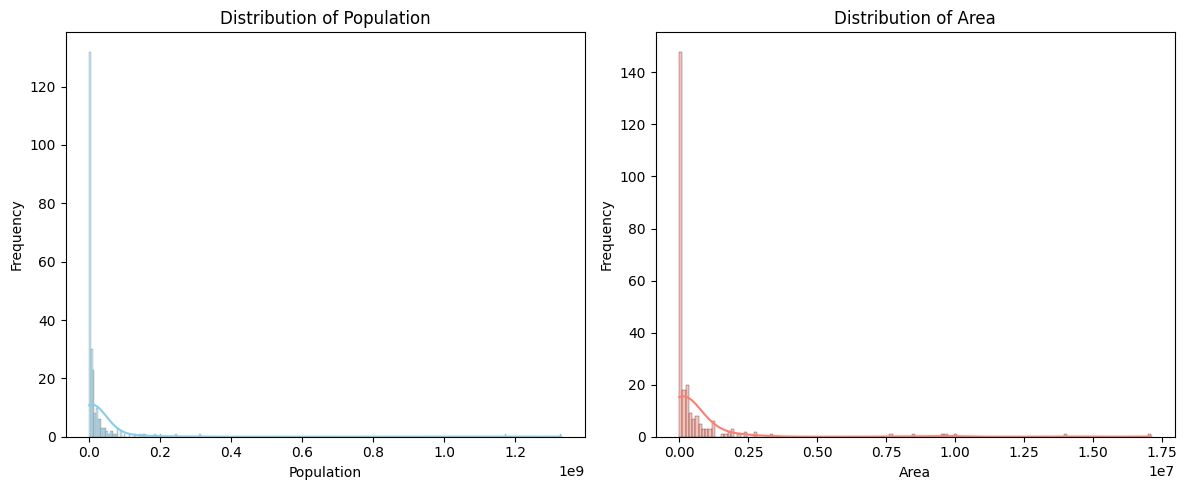

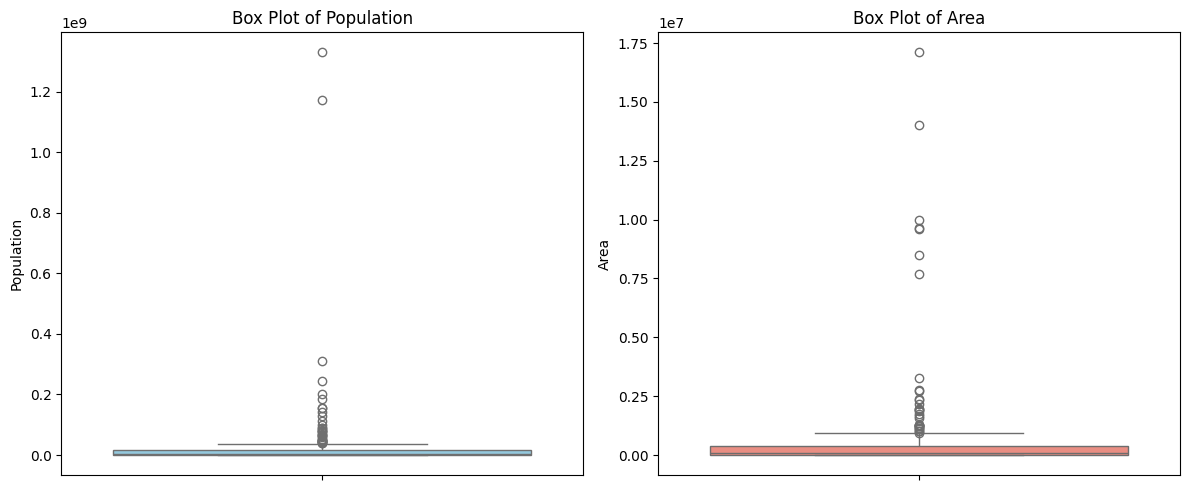

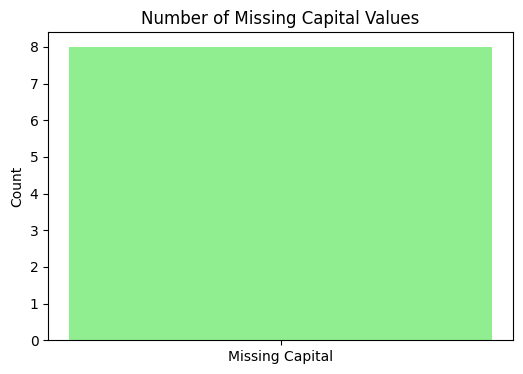

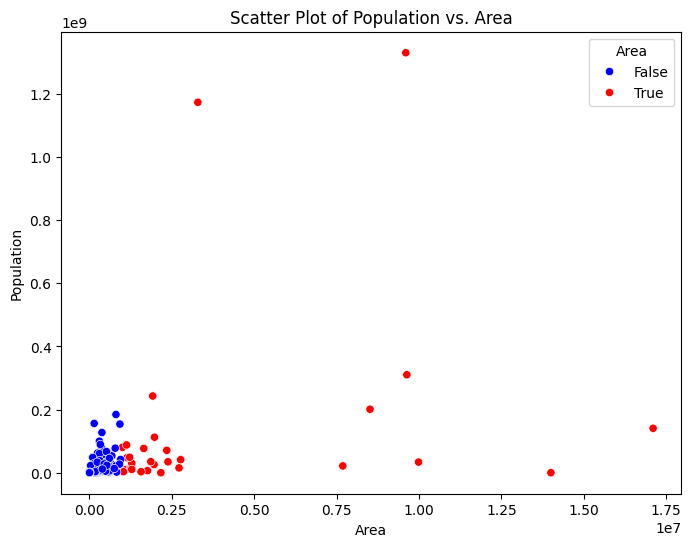

                                  Name Capital  Population        Area
8                           Antarctica     NaN           0  14000000.0
33                       Bouvet Island     NaN           0        49.0
95   Heard Island and McDonald Islands     NaN           0       412.0
231        U.S. Minor Outlying Islands     NaN           0         0.0


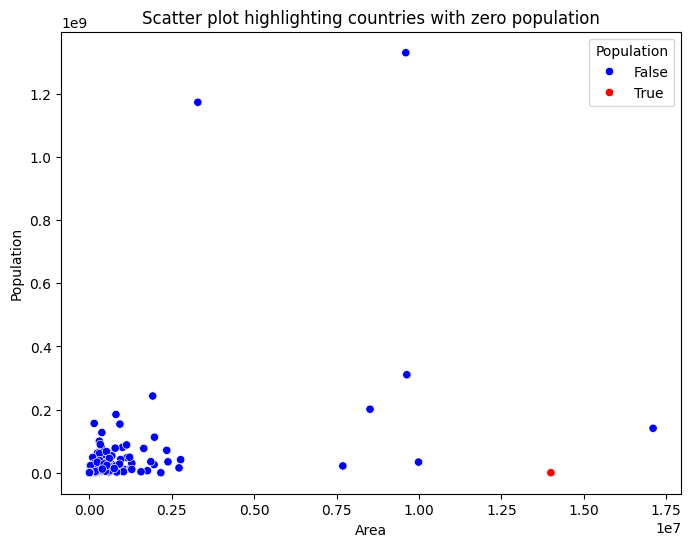

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Distributions of 'Population' and 'Area'
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['Population'], kde=True, color='skyblue')
plt.title('Distribution of Population')
plt.xlabel('Population')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(df['Area'], kde=True, color='salmon')
plt.title('Distribution of Area')
plt.xlabel('Area')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(y=df['Population'], color='skyblue')
plt.title('Box Plot of Population')
plt.ylabel('Population')

plt.subplot(1, 2, 2)
sns.boxplot(y=df['Area'], color='salmon')
plt.title('Box Plot of Area')
plt.ylabel('Area')

plt.tight_layout()
plt.show()


# 2. Missing 'Capital' values
missing_capital_counts = df['Capital'].isnull().sum()
plt.figure(figsize=(6, 4))
plt.bar(['Missing Capital'], [missing_capital_counts], color='lightgreen')
plt.title('Number of Missing Capital Values')
plt.ylabel('Count')
plt.show()


# 3. Relationship between 'Population' and 'Area'
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Area', y='Population', data=df, hue=df['Area'] > 1000000, palette=["blue", "red"]) # Highlight large areas
plt.title('Scatter Plot of Population vs. Area')
plt.xlabel('Area')
plt.ylabel('Population')
plt.show()

# Additional visualization for zero population countries
zero_pop_countries = df[df['Population'] == 0]
print(zero_pop_countries)

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Area', y='Population', data=df, hue=df['Population'] == 0, palette=["blue", "red"])
plt.title('Scatter plot highlighting countries with zero population')
plt.show()

## Summary:

### 1. Q&A

The provided data analysis does not explicitly pose questions. However, the analysis implicitly explores questions like:

* What are the key characteristics of the dataset?
* What are the distributions of population and area?
* Are there any missing values or outliers?
* What is the relationship between population and area?


### 2. Data Analysis Key Findings

* **Data Shape:** The dataset contains 250 rows and 4 columns.
* **Missing Values:** 8 countries (3.2%) are missing capital data.  Several countries have a population or area of 0, which might indicate errors or missing data.  Specifically, four countries have a population of 0, and one has an area of 0.
* **Skewed Distributions:**  Both 'Population' and 'Area' exhibit highly skewed distributions with numerous outliers, as revealed by histograms and box plots.
* **Correlation:** A positive correlation (approximately 0.41) exists between population and area, though the presence of outliers impacts the interpretation of this relationship.
* **Zero Population:** Four countries have a population of zero: Antarctica, Bouvet Island, Heard Island and McDonald Islands, U.S. Minor Outlying Islands.

### 3. Insights or Next Steps

* **Data Cleaning:**  Address the missing capital values and investigate the records with zero population or area. Decide on appropriate strategies (imputation, removal, or further investigation) for handling these inconsistencies. Consider transformation (e.g., logarithmic transformation) for skewed numerical variables.
* **Further Analysis:** Explore relationships between other variables or create new features (e.g., population density) to gain deeper insights.  Consider grouping countries based on continents or other relevant criteria to facilitate more nuanced comparisons.
